# Analyse exploratoire, traitements, modélisation des données

## 0 - Chargement des librairies et du dataset

In [89]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import kruskal
from scipy.stats import pointbiserialr
from scipy.stats import randint, uniform



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv')

## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

#### 1.1.2 - Observation des types de données

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 1.1.3 - Observation des valeurs Null

In [7]:
df_expl = df.drop(columns='Unnamed: 32', axis= 1)

df_expl[df_expl.isna().any(axis= 1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Il n'y a pas de valeurs null dans le dataset mis à part sur la colonne Unamed : 32 --> 100% null

### 1.2 - Observation des variables numériques

#### 1.2.1 - Analyse de la distribution

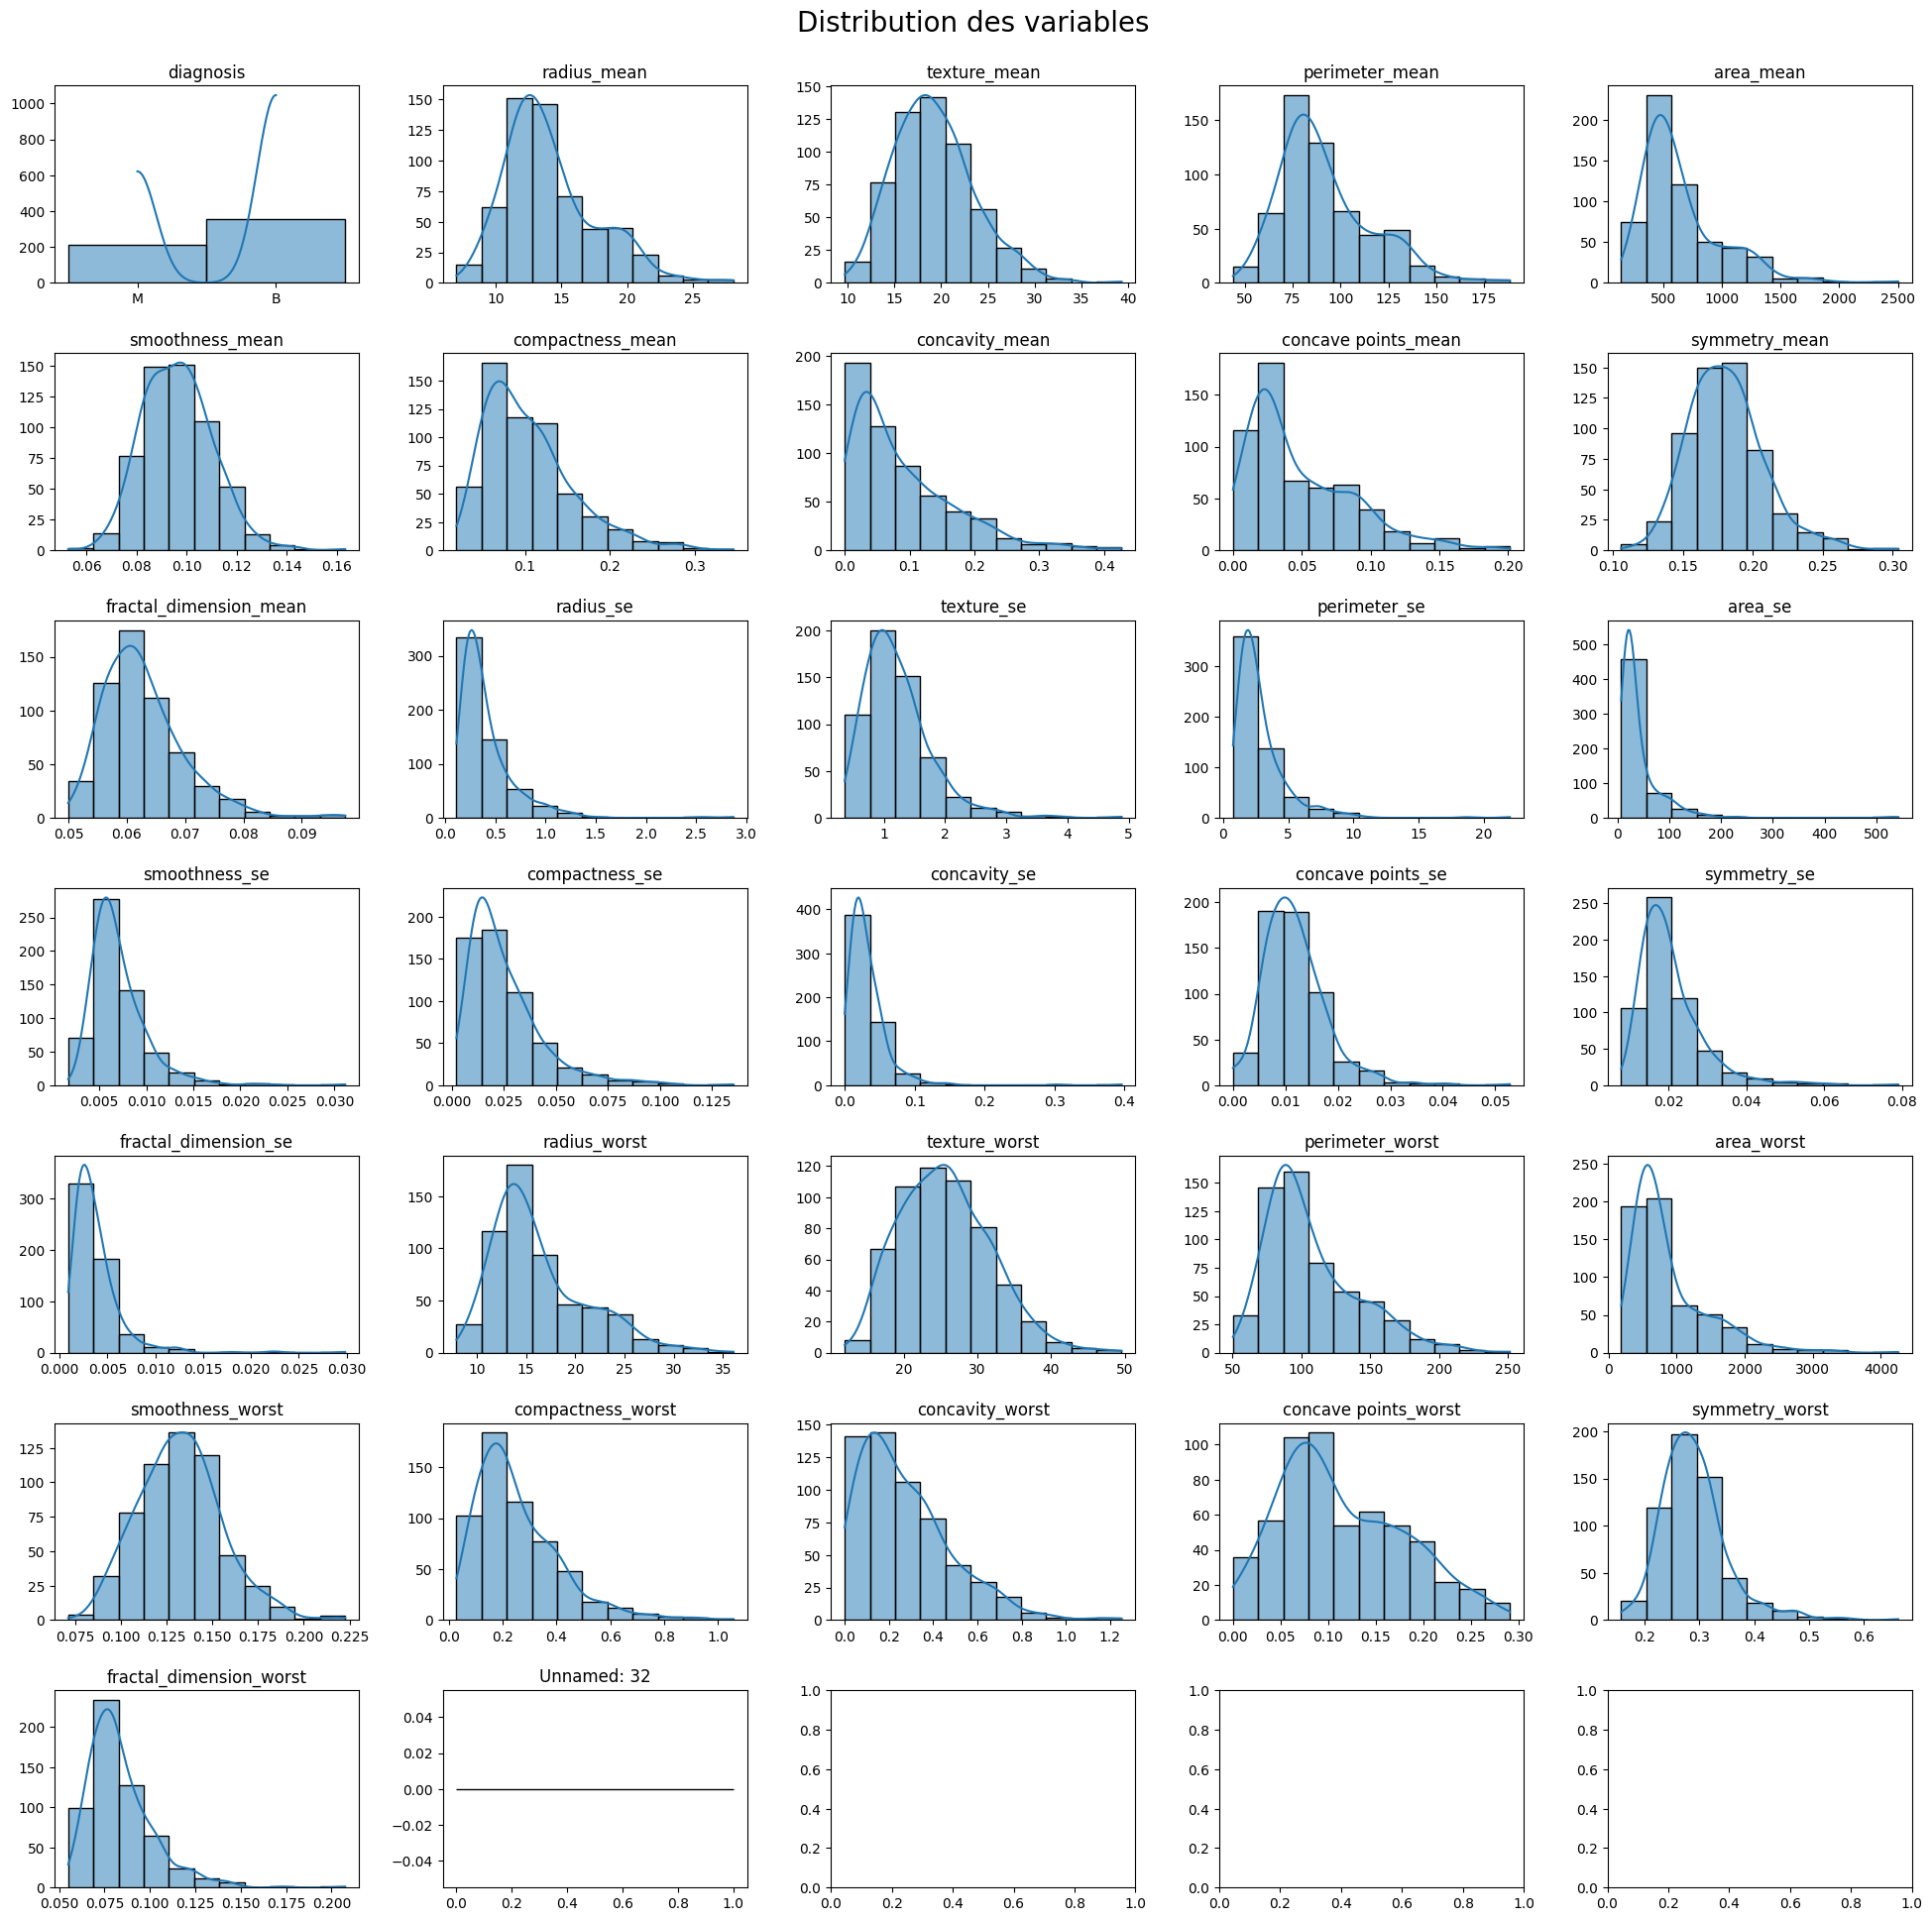

In [8]:
fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

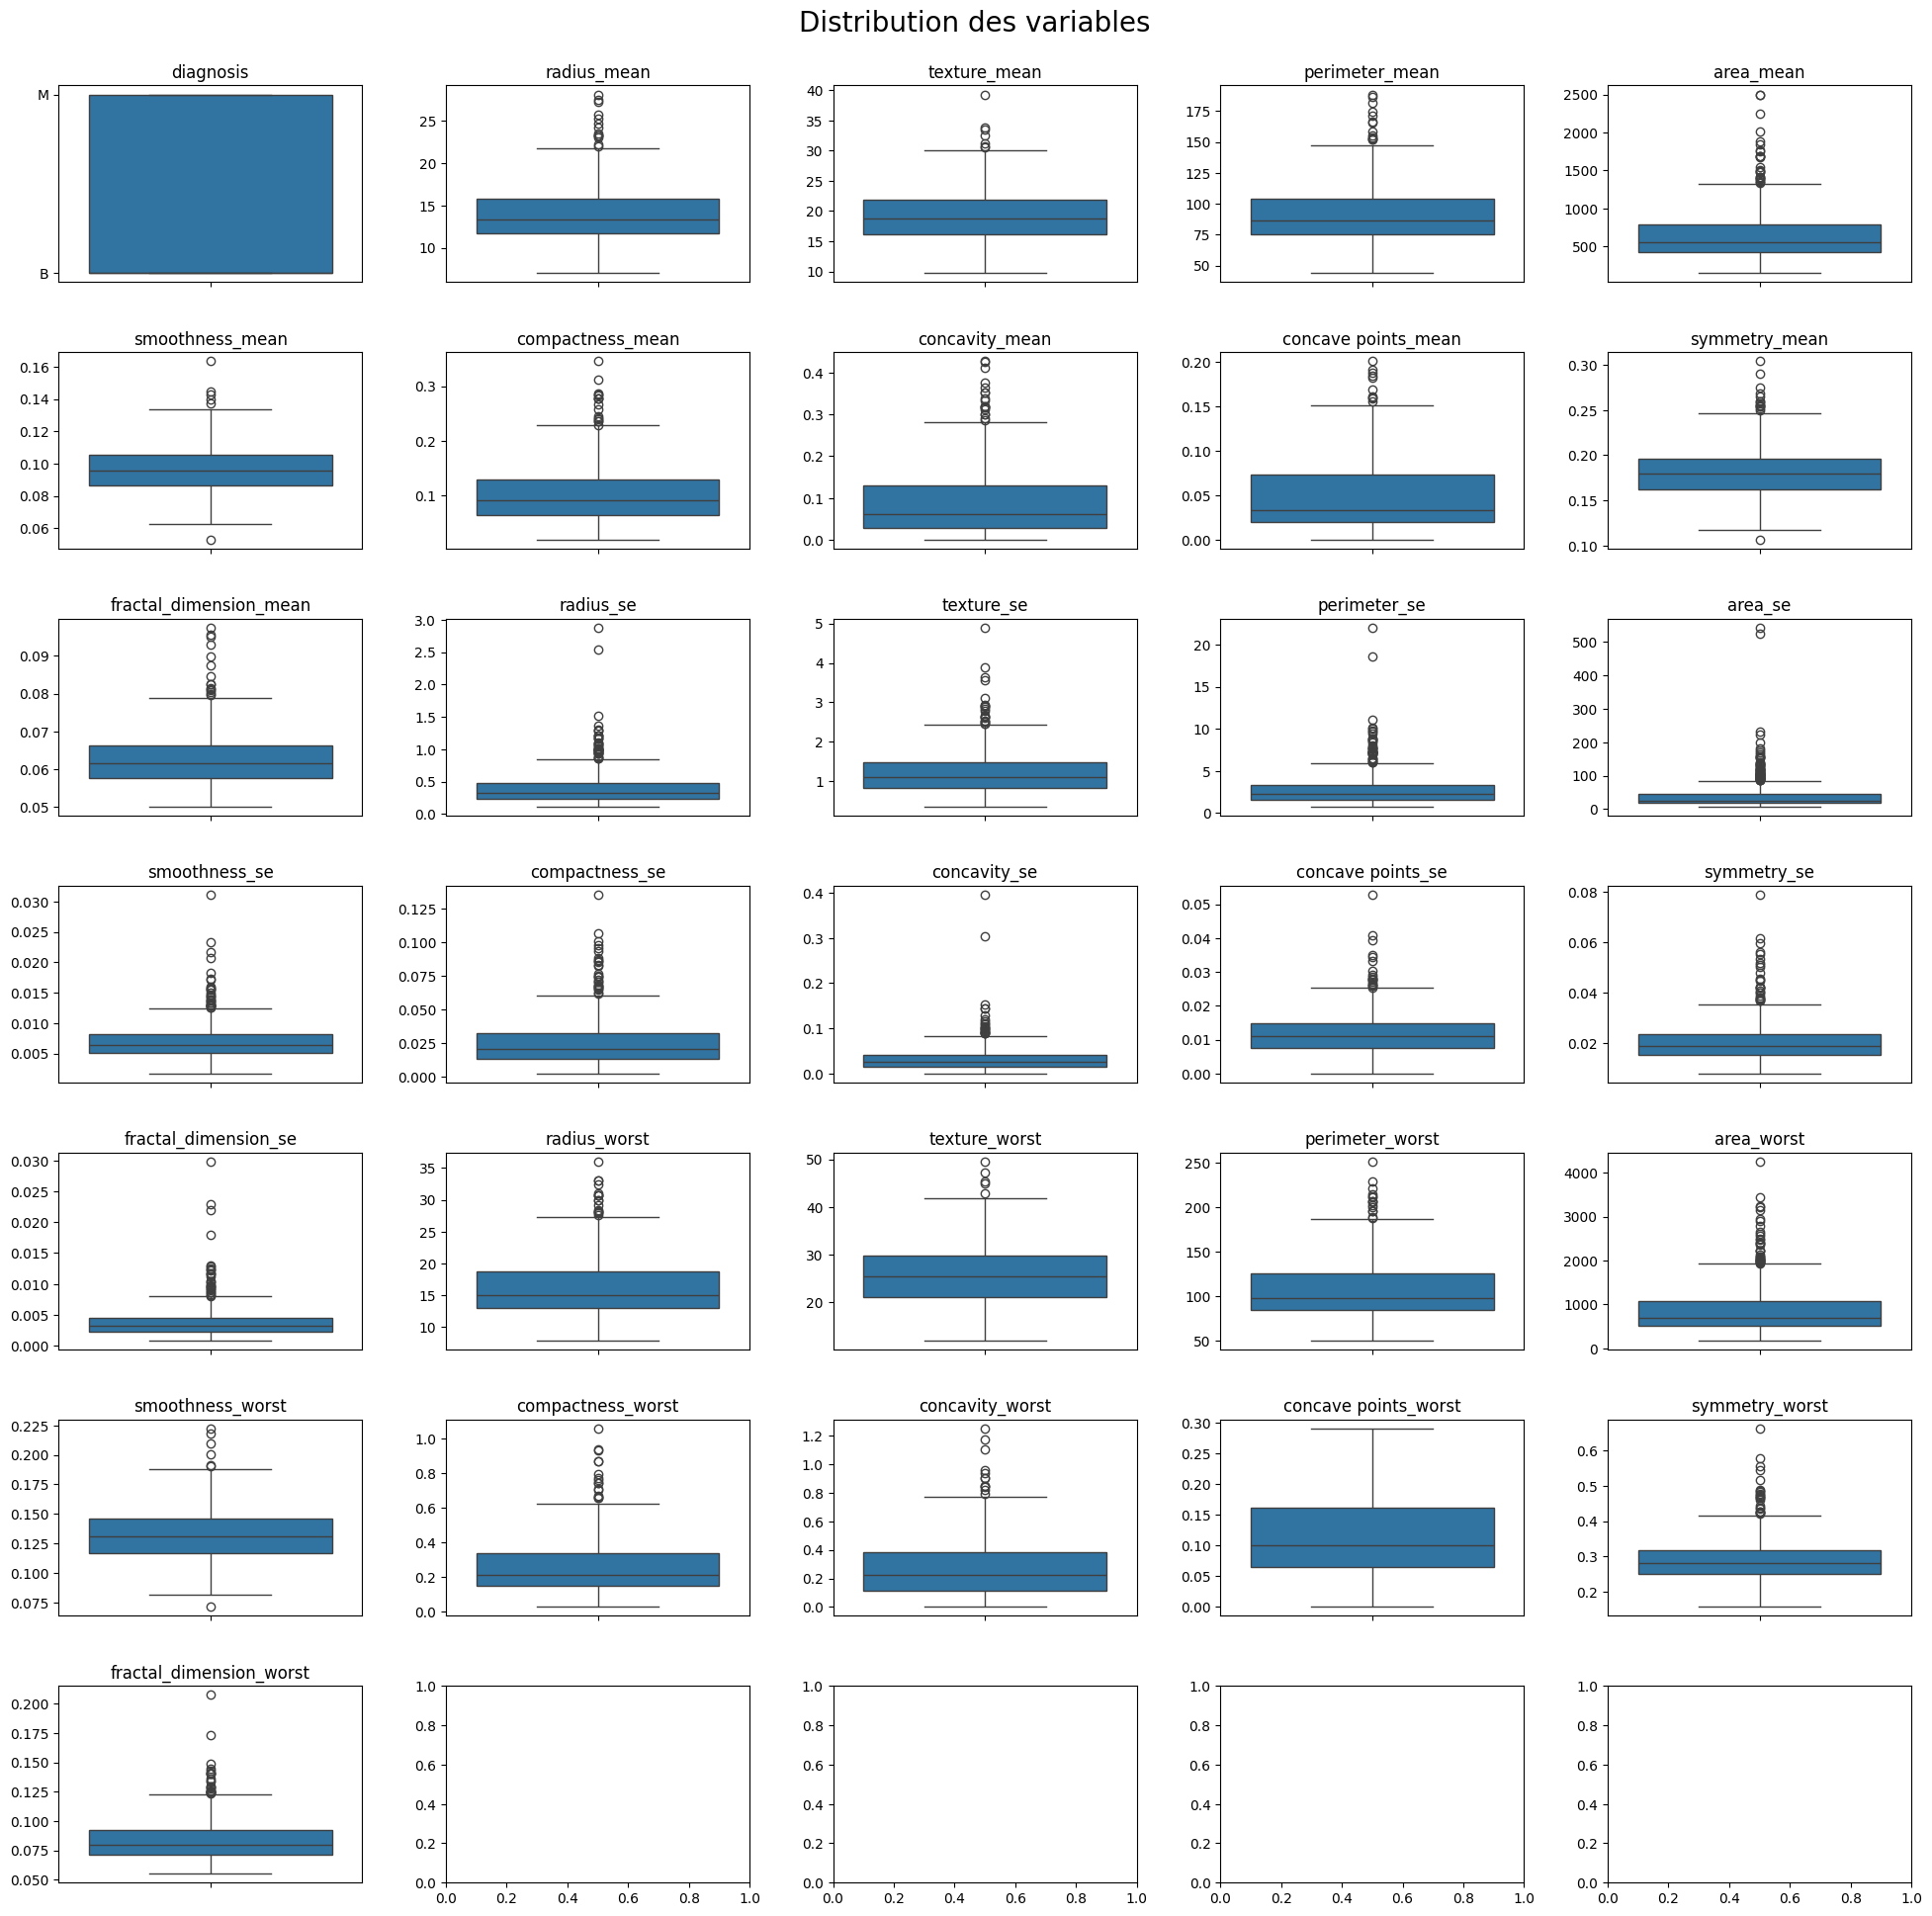

In [9]:
'''
Observation des data pour observer les outliers 
suite à l'observation des distributions sur les variables
'''

fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_expl.columns[1:]):
    sns.boxplot(df_expl[col],  ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

D'après les définitions des variables et les valeurs attendu il ne devraient y avoir des outliers que sur la patie supérieures (et non en dessous de Q1)
#### Commentaire sur les outliers Q1:
Symetry mean : les outliers petit n'ont pas de sens et semble être une valeure abérante
Smoothness mean et worst : l'outliers faible montre une celule très lisse , la valeure semble abérante

#### Commentaires sur les outliers Q3:
L'ensembles des outliers de ce type pourrait correspondre à des carractéristiques de cellules Malines -> avec mon niveau de connaissance, je ne peut pas me prononcer sur le fait que ce soient des valeurs abérantes ou non.

#### 1.2.2 - Analyse statique descriptive de base

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
# Observation des valeurs à zéro et des colonnes associés 
# enregistrement dans liste du numero id de chaque ligne contenant au moins un zero

id_avec_des_0 = []

for col in df.columns:
    
    if len(df[df[col] == 0]) != 0:
        df_new = df[df[col] == 0]

        print(f'{col} : {len(df[df[col] == 0])}')

        # ajout de l'index dans une liste
        for ligne in df_new['id']:
            id_avec_des_0.append(ligne)

# set de la liste pour recuupérer les id
id_avec_des_0 = set(id_avec_des_0)

id_avec_des_0

concavity_mean : 13
concave points_mean : 13
concavity_se : 13
concave points_se : 13
concavity_worst : 13
concave points_worst : 13


{92751,
 862722,
 868999,
 871642,
 872113,
 875099,
 894047,
 903483,
 921092,
 923748,
 925236,
 925311,
 9113846}

##### Les valeurs à zéro sur les varaiables suivantes ont-elle un sens ?
concavity_mean  
concave points_mean  
concavity_se  
concave points_se  
concavity_worst  
concave points_worst  

--> vu avec le client : suppression de ces lignes

### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [13]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

#### 1.3.2 - Analyse des  statistique de base

In [14]:
'''
L'analyse n'est pas nécessaire sur les données catégoritiles, uniquement le diagnostique
'''

"\nL'analyse n'est pas nécessaire sur les données catégoritiles, uniquement le diagnostique\n"

## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

In [15]:
'''
Aucune valeur manquante ormis sur le uname:32 --> drop de la colonne
'''
df.drop(columns='Unnamed: 32', axis= 1, inplace=True)

### 2.2 - Traitement des doublons

In [16]:
'''
Aucun doublon dans le dataset en se basant sur la colonne d'index
les autres valeurs sont des valeurs continues avec une distrubution qui semble conforme
'''

"\nAucun doublon dans le dataset en se basant sur la colonne d'index\nles autres valeurs sont des valeurs continues avec une distrubution qui semble conforme\n"

### 2.3 - Traitement des valeurs abérantes

Les outliers ne sont pas à éliminé --> vu client

In [17]:
# def remove_outliers_iqr(df):
#     numeric_columns = df.select_dtypes(include=['number']).columns

#     for column in numeric_columns[1:]:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # suppression des outliers Q1 -1.5*IQR
#         df = df[(df[column] >= lower_bound)]
#         # supp des outiliers Q3+1.5
#         # df = df[(df[column] <= upper_bound)]
    
#     return df

In [18]:
# df_cleaned = remove_outliers_iqr(df)

df_cleaned = df

In [19]:
# Suppression des lignes ouù il y a des valeurs à zéro --> Vu avec le client 
id_avec_des_0

df_cleaned = df_cleaned[~df_cleaned['id'].isin(id_avec_des_0)]

## 3 - Visualisation des données nettoyées

In [20]:
# Séparation en 3 dataframe : mean, se, worst
df_cleaned_mal = df_cleaned[df_cleaned.columns[1:2]]

df_cleaned_mean = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[2:12]]], axis = 1)
df_cleaned_se = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[12:22]]], axis = 1)
df_cleaned_worst = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[22:32]]], axis = 1)

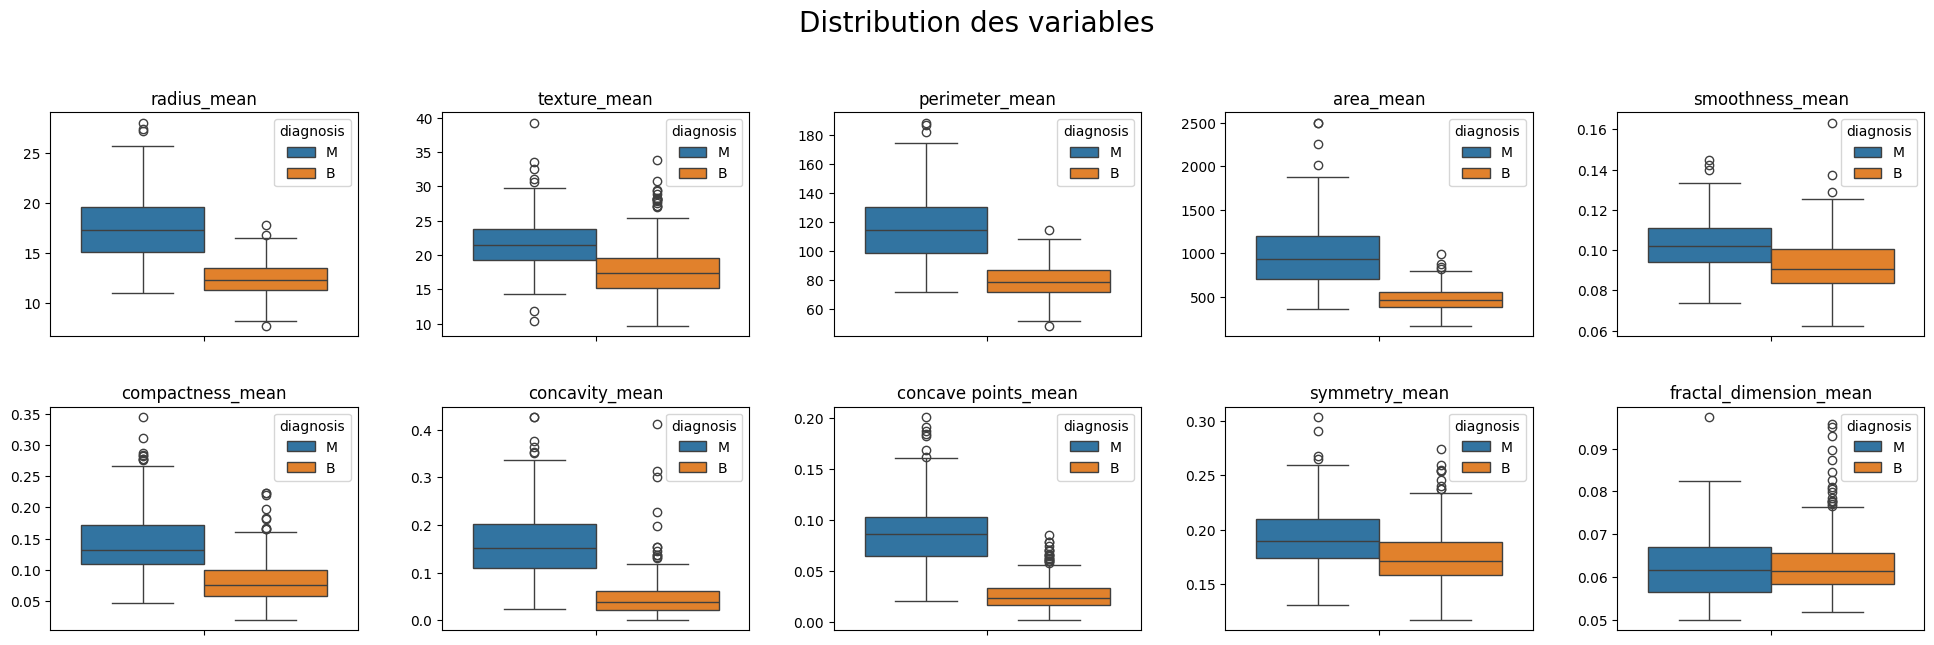

In [21]:
'''
Observation des data mean
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_mean.columns[1:]):
    sns.boxplot(data=df_cleaned_mean, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

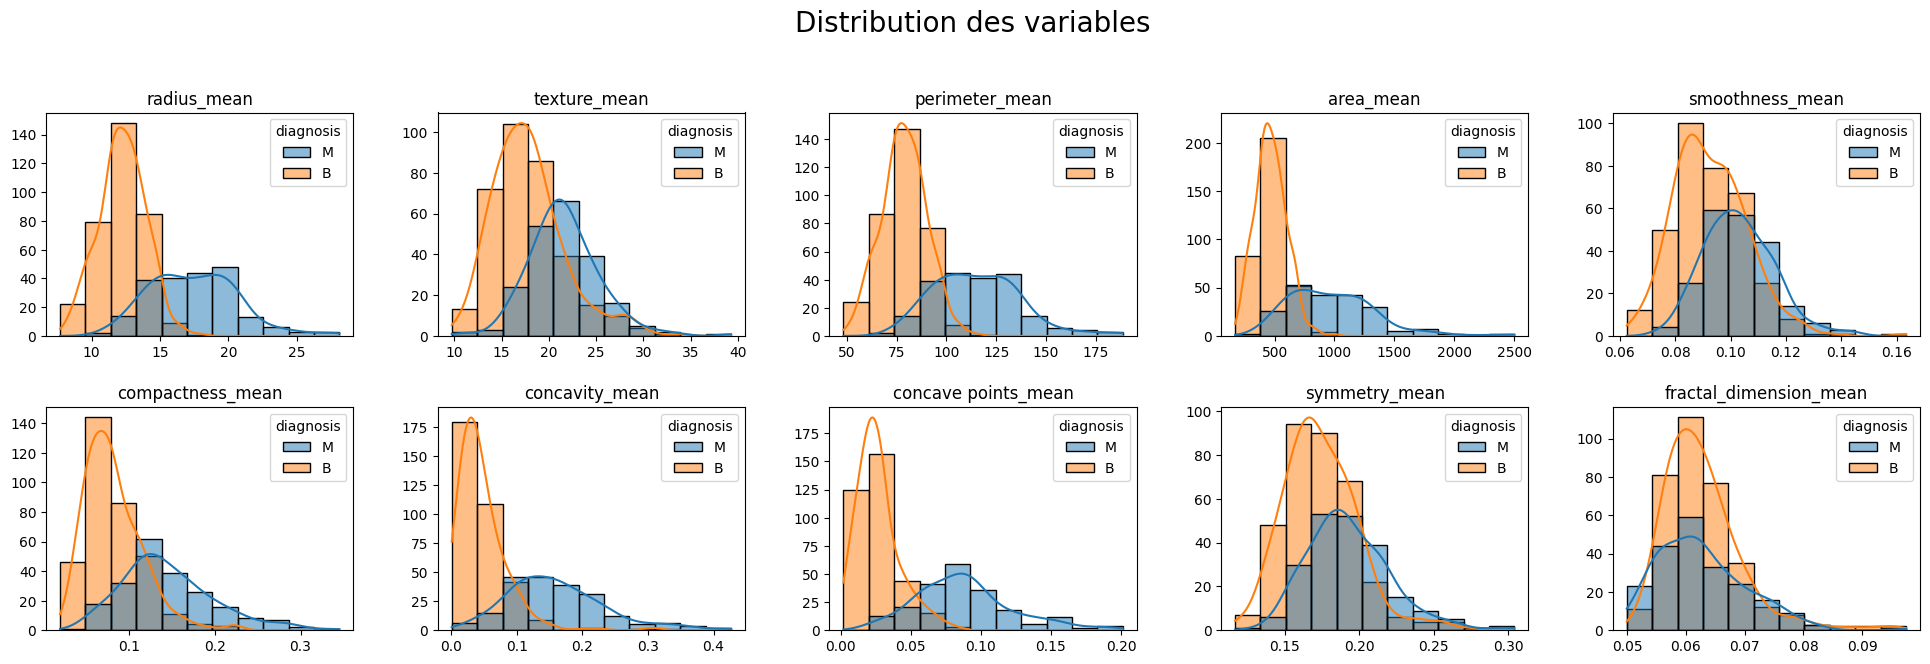

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_mean.columns[1:]):
    sns.histplot(df_cleaned_mean, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

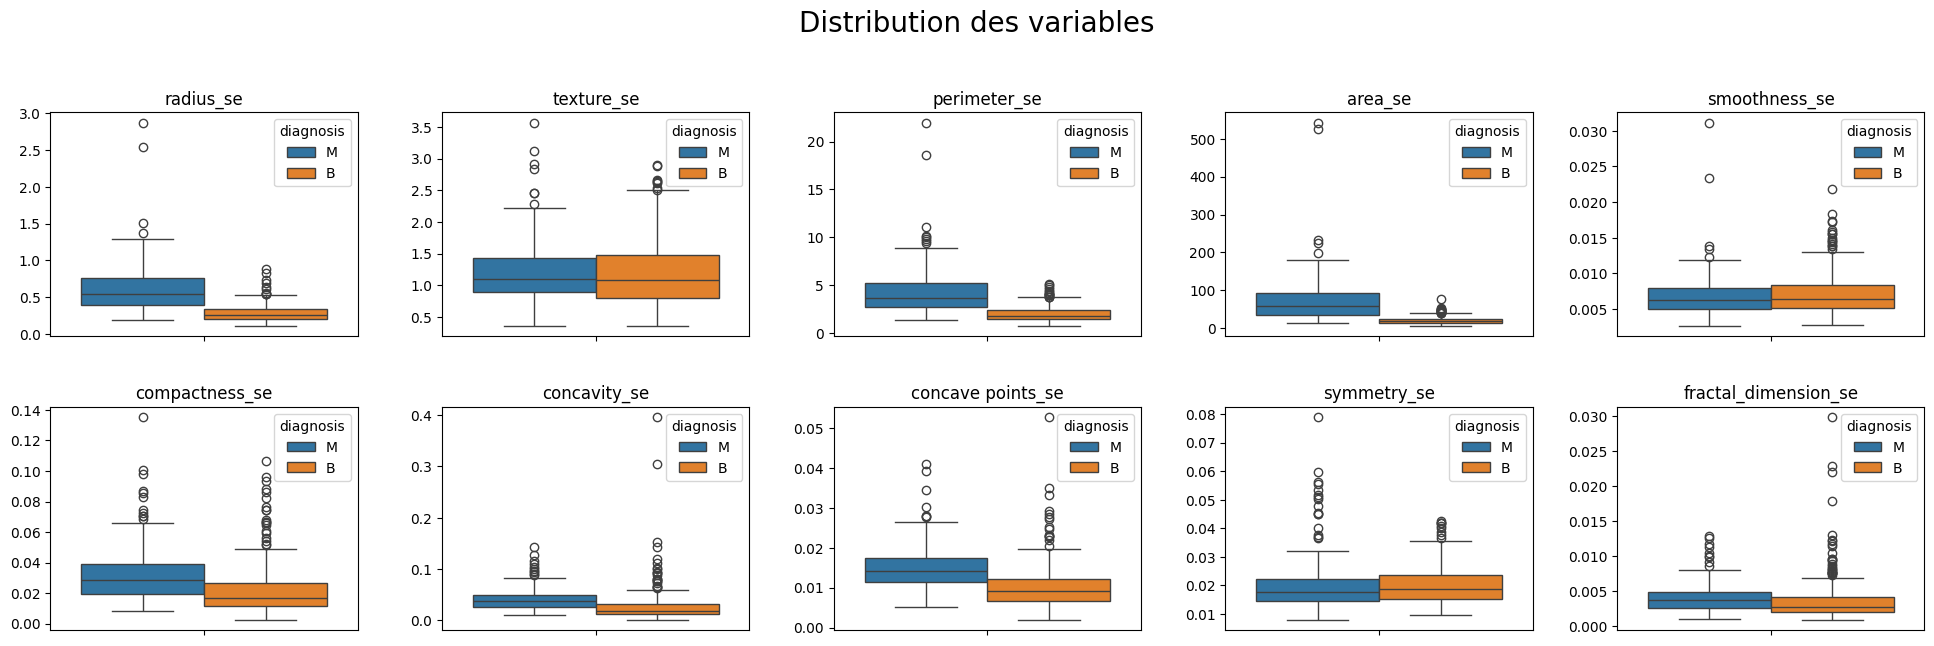

In [23]:
'''
Observation des data se
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_se.columns[1:]):
    sns.boxplot(data=df_cleaned_se, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

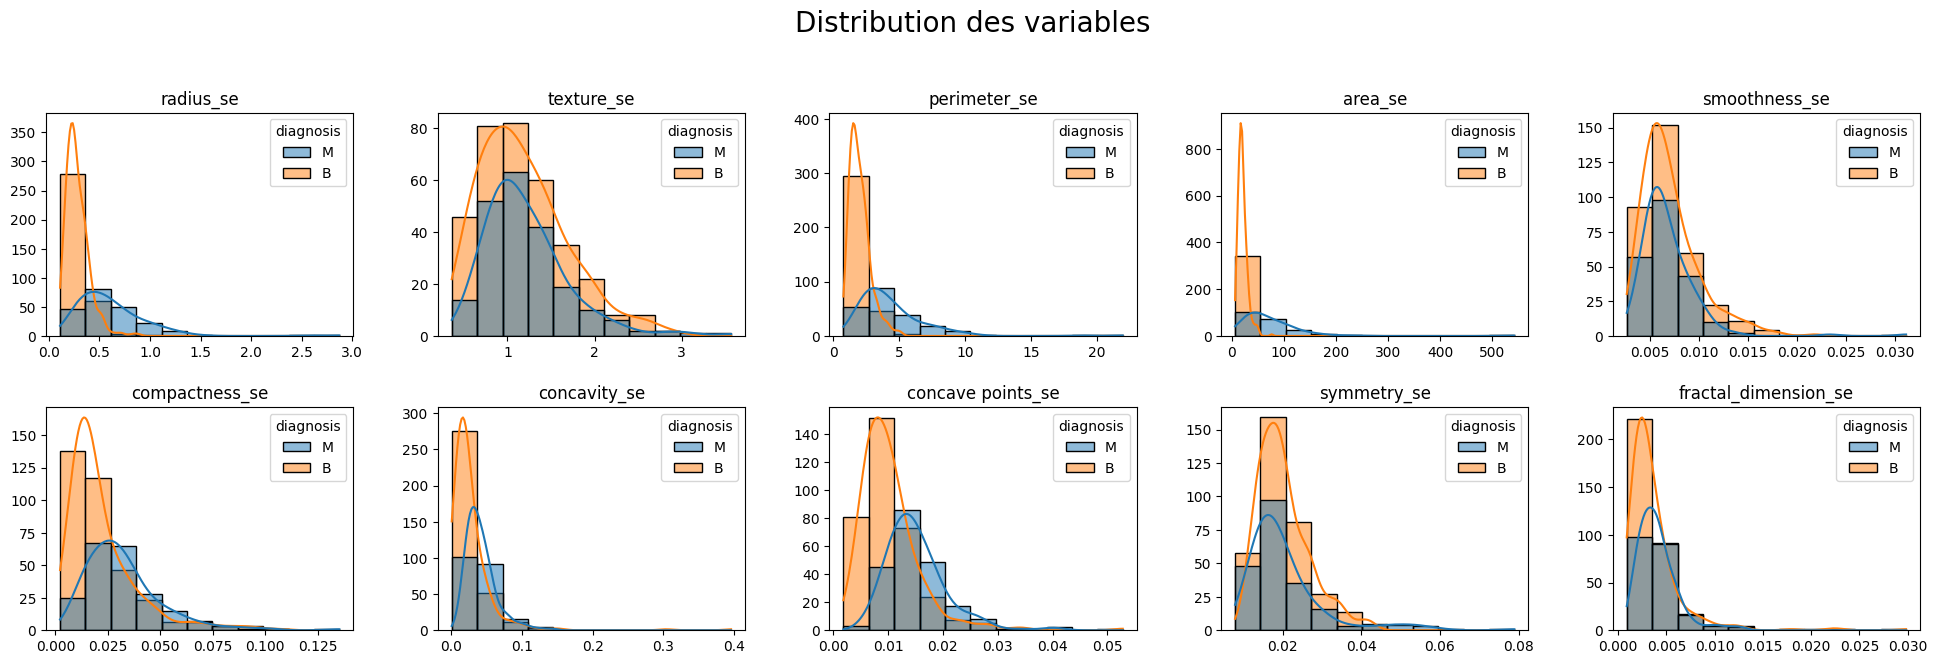

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_se.columns[1:]):
    sns.histplot(df_cleaned_se, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

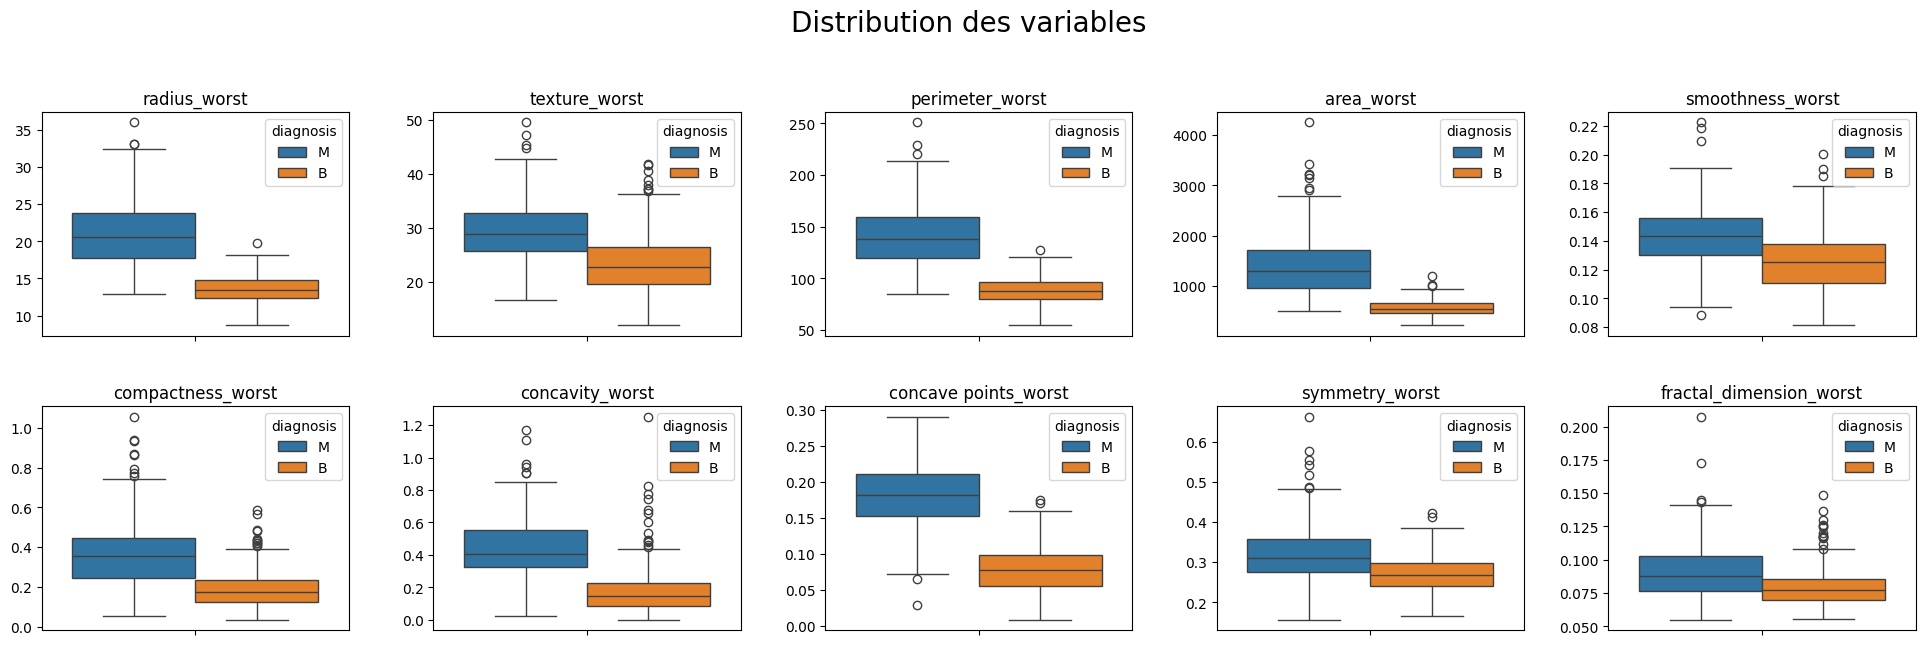

In [25]:
'''
Observation des data mean
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_worst.columns[1:]):
    sns.boxplot(data=df_cleaned_worst, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

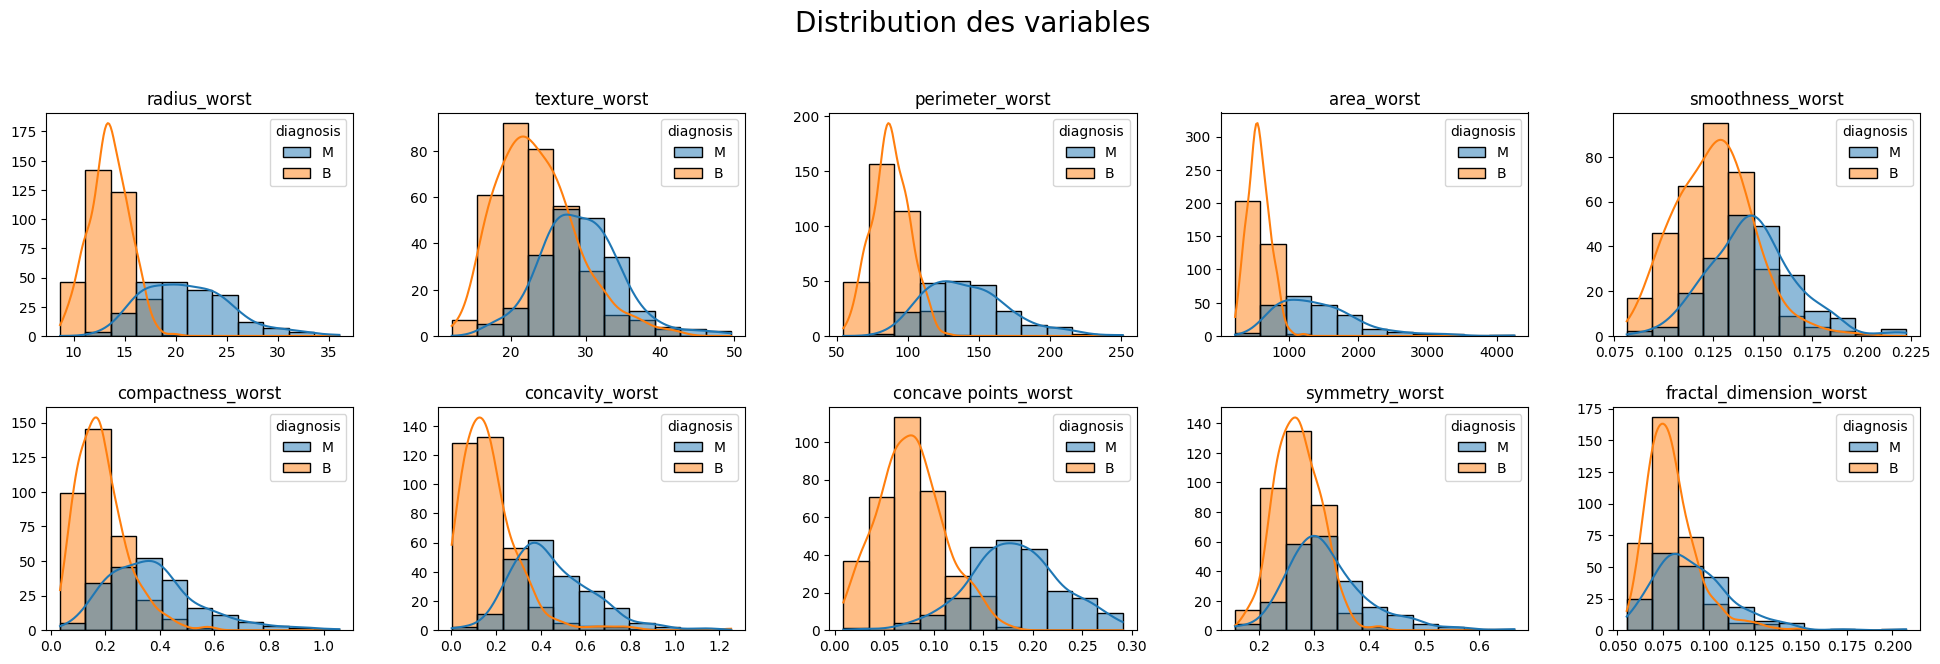

In [26]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_worst.columns[1:]):
    sns.histplot(df_cleaned_worst, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

#### 3.2 - Observation des correlations

##### 3.2.1 - Correlations des variables numériques continues

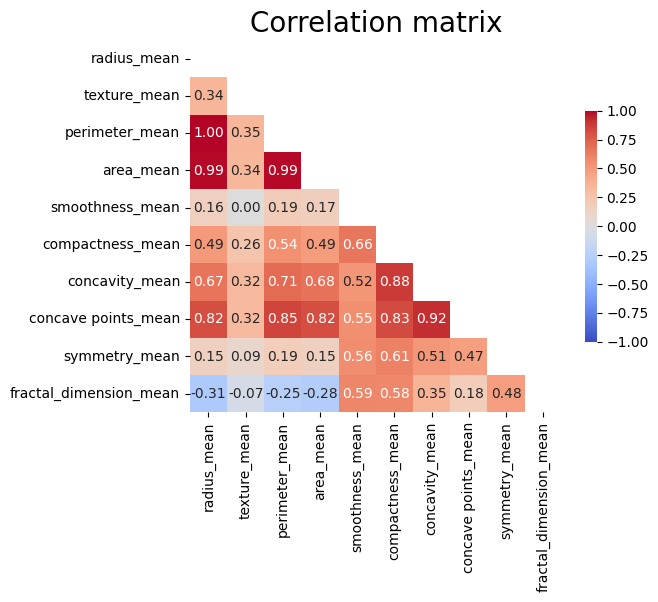

In [27]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_mean.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_mean[list_columns_corr].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

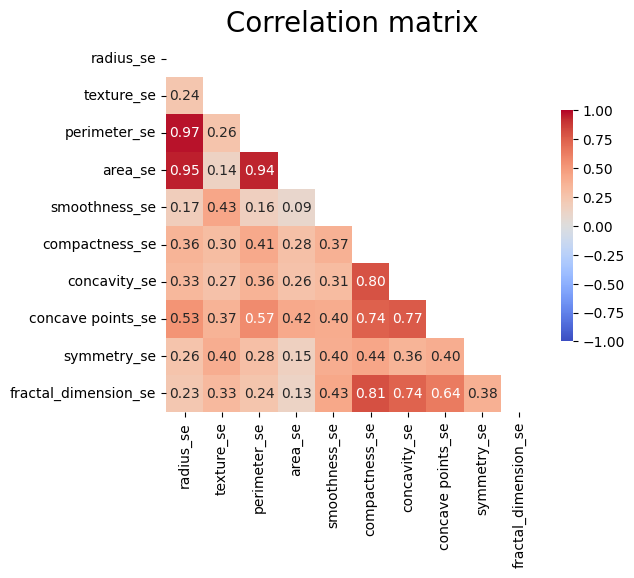

In [28]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_se.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_se[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

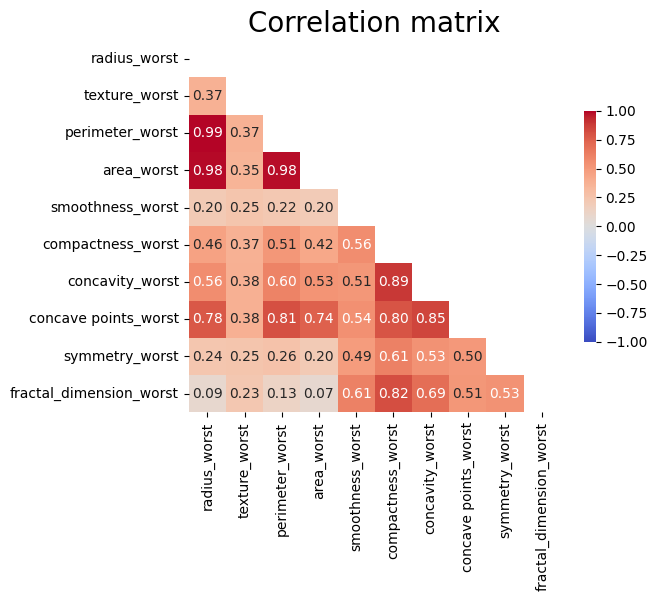

In [29]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_worst.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_worst[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

#####  3.2.2 - Correlations des variables numériques et de la variable de classification

In [30]:
# encodage 0 ou 1 pour la class 'diagnosis'
label_encoder = LabelEncoder()

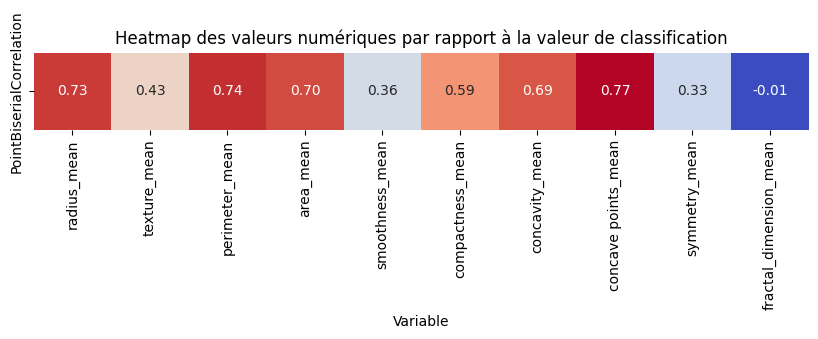

In [31]:
df_cleaned_mean['diagnosis_encoded'] = label_encoder.fit_transform(df_cleaned_mean['diagnosis'])

continuous_cols = df_cleaned_mean.iloc[:,1:-1]

# Calculer la corrélation bisériale ponctuelle pour chaque variable continue
correlations = {}
for col in continuous_cols.columns:

    correlations[col] = pointbiserialr(df_cleaned_mean['diagnosis_encoded'], df_cleaned_mean[col])[0]

# Convertir le dictionnaire en DataFrame pour la heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

# créer la figure
plt.figure(figsize=(10, 1))

sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

# Affichez la heatmap
plt.show()

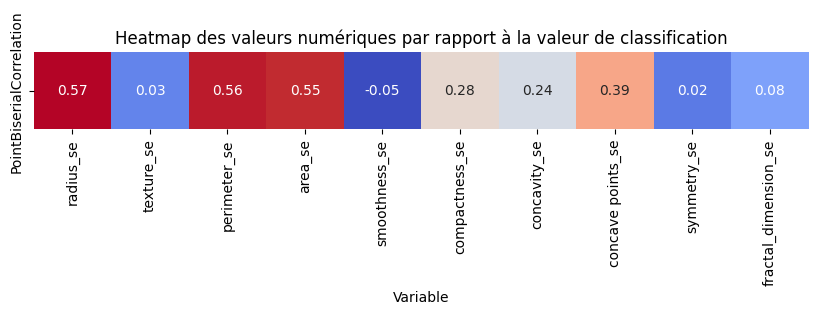

In [32]:
# encodage 0 ou 1 pour la class 'diagnosis'
df_cleaned_se['diagnosis_encoded'] = label_encoder.fit_transform(df_cleaned_se['diagnosis'])

continuous_cols = df_cleaned_se.iloc[:,1:-1]

# Calculer la corrélation bisériale ponctuelle pour chaque variable continue
correlations = {}
for col in continuous_cols.columns:

    correlations[col] = pointbiserialr(df_cleaned_se['diagnosis_encoded'], df_cleaned_se[col])[0]

# Convertir le dictionnaire en DataFrame pour la heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

# créer la figure
plt.figure(figsize=(10, 1))

sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

# Affichez la heatmap
plt.show()

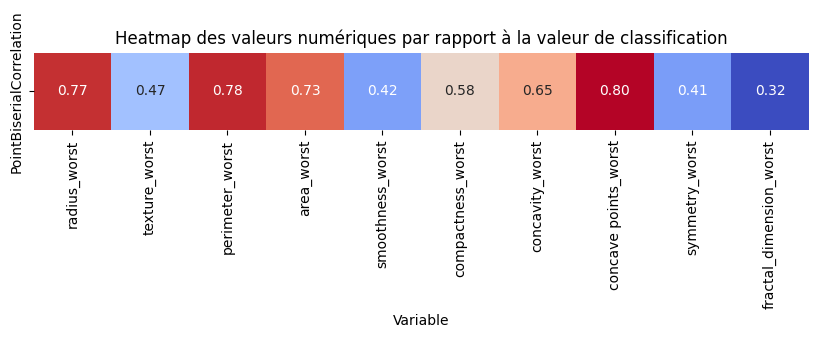

In [33]:
# encodage 0 ou 1 pour la class 'diagnosis'

df_cleaned_worst['diagnosis_encoded'] = label_encoder.fit_transform(df_cleaned_worst['diagnosis'])

continuous_cols = df_cleaned_worst.iloc[:,1:-1]

# Calculer la corrélation bisériale ponctuelle pour chaque variable continue
correlations = {}
for col in continuous_cols.columns:

    correlations[col] = pointbiserialr(df_cleaned_worst['diagnosis_encoded'], df_cleaned_worst[col])[0]

# Convertir le dictionnaire en DataFrame pour la heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

# créer la figure
plt.figure(figsize=(10, 1))

sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

# Affichez la heatmap
plt.show()

## 4 - Validation statistique pour l'interpretabilité des résultats

### 4.1 - Separation des variables en df_B et df_M

In [34]:
df_B_mean = df_cleaned_mean[df_cleaned_mean['diagnosis']== "B"]
df_M_mean = df_cleaned_mean[df_cleaned_mean['diagnosis']== "M"]

df_B_se = df_cleaned_se[df_cleaned_se['diagnosis']== "B"]
df_M_se = df_cleaned_se[df_cleaned_se['diagnosis']== "M"]

df_B_worst = df_cleaned_worst[df_cleaned_worst['diagnosis']== "B"]
df_M_worst = df_cleaned_worst[df_cleaned_worst['diagnosis']== "M"]

### 4.2 - Test sur les variables

<b>Sélection du Test</b>  

<u>Données normales et variances égales :</u> Utilisez le test t de Student.  

<u>Données normales et variances inégales :</u>  Utilisez le test t de Welch.  

<u>Données non normales :</u>  Utilisez le test de Mann-Whitney U ou Kruskal-Wallis (extension non paramétrique du test de Mann-Whitney U) ou le test de Kolmogorov-Smirnov.  

<u>Données catégorielles :</u>  Utilisez le test de chi-carré ou le test de Fisher.  

Test t de Student :

Objectif : Comparer les moyennes de deux échantillons indépendants.
Conditions : Les données doivent être normalement distribuées et les variances des deux échantillons doivent être égales (homoscédasticité).
Variante : Test t de Welch, utilisé lorsque les variances ne sont pas égales.

NB :  
Test de chi-carré :

Objectif : Comparer les distributions de deux variables catégorielles (si la variable est discrète).  
Conditions : Les données doivent être sous forme de comptage dans des catégories.
  
  
Test de Fisher :

Objectif : Comparer les proportions dans des tableaux de contingence pour des petits échantillons.  
Conditions : Utilisé lorsque les effectifs des catégories sont petits.

Test de Mann-Whitney U (ou test de Wilcoxon pour échantillons indépendants) :

Objectif : Comparer les distributions de deux échantillons indépendants.  
Conditions : Non paramétrique, donc aucune hypothèse sur la distribution des données.  
  
  
Test de Kolmogorov-Smirnov :

Objectif : Comparer les distributions cumulatives de deux échantillons.  
Conditions : Non paramétrique, donc aucune hypothèse sur la distribution des données.  

#### 4.2.1 - Test sur les variables catégorielles

In [35]:
'''
Non concerné pour dataset cancer de sein
'''

'\nNon concerné pour dataset cancer de sein\n'

#### 4.2.2 - Variable continue

##### 4.2.2.1 - Test de kruskal-wallis

Interprétation des résultats  
Statistique H : Valeur de la statistique de Kruskal-Wallis.  
p-value : Si la p-value est inférieure à un seuil alpha (par exemple 0.05), vous rejetez l'hypothèse nulle selon laquelle les distributions des échantillons sont identiques.

In [36]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size = min(len(df_M_mean), len(df_B_mean))

# # Réduire chaque DataFrame à la taille minimale
# df_M_mean = df_M_mean.sample(n=min_size, random_state=42)
# df_B_mean = df_B_mean.sample(n=min_size, random_state=42)

In [37]:
# parcours des variables pour le test sur mean

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset mean')
print(f'M : {len(df_M_mean)}')
print(f'B : {len(df_B_mean)}\n')

# Uniformaisation des echantillon

print(f'\nResultat des tests sur les différentes variables\n')

for var_mean in df_M_mean.columns[1:]:
    stat, p = kruskal(df_M_mean[var_mean], df_B_mean[var_mean])

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_mean}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_mean} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_mean} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset mean
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : radius_mean
 H= 297.666
 p= 0.00000

---------------------------------

Résultat sur la variable mean : texture_mean
 H= 126.344
 p= 0.00000

---------------------------------

Résultat sur la variable mean : perimeter_mean
 H= 311.034
 p= 0.00000

---------------------------------

Résultat sur la variable mean : area_mean
 H= 298.801
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_mean
 H= 75.565
 p= 0.00000

---------------------------------

Résultat sur la variable mean : compactness_mean
 H= 202.699
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concavity_mean
 H= 297.956
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concave points_mean
 H= 336.945
 p= 0.00000

--------------------------

In [38]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size_se = min(len(df_M_se), len(df_B_se))

# # Réduire chaque DataFrame à la taille minimale
# df_M_se = df_M_se.sample(n=min_size_se, random_state=42)
# df_B_se = df_B_se.sample(n=min_size_se, random_state=42)

In [39]:
# parcours des variables pour le test sur se

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset se')
print(f'M : {len(df_M_se)}')
print(f'B : {len(df_B_se)}\n')

# Uniformaisation des echantillon

print(f'\nResultat des tests sur les différentes variables\n')

for var_se in df_M_se.columns[1:]:
    stat, p = kruskal(df_M_se[var_se], df_B_se[var_se])

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_se}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_se} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_se} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset se
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : radius_se
 H= 216.972
 p= 0.00000

---------------------------------

Résultat sur la variable mean : texture_se
 H= 0.770
 p= 0.38035

L'hypothèse selon laquelle les distributions des échantillons de texture_se sont différentes est refusé.

---------------------------------

Résultat sur la variable mean : perimeter_se
 H= 224.905
 p= 0.00000

---------------------------------

Résultat sur la variable mean : area_se
 H= 285.352
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_se
 H= 0.772
 p= 0.37962

L'hypothèse selon laquelle les distributions des échantillons de smoothness_se sont différentes est refusé.

---------------------------------

Résultat sur la variable mean : compactness_se
 H= 75.037
 p= 0.00000

---------------------------------

Résultat sur 

In [40]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size_worst = min(len(df_M_worst), len(df_B_worst))

# # Réduire chaque DataFrame à la taille minimale
# df_M_worst = df_M_worst.sample(n=min_size_worst, random_state=42)
# df_B_worst = df_B_worst.sample(n=min_size_worst, random_state=42)

In [41]:
# parcours des variables pour le test sur mean

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset mean')
print(f'M : {len(df_M_worst)}')
print(f'B : {len(df_B_worst)}\n')

# Uniformaisation des echantillon

print(f'\nResultat des tests sur les différentes variables\n')

for var_worst in df_M_worst.columns[1:]:
    stat, p = kruskal(df_M_worst[var_worst], df_B_worst[var_worst])

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_worst}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_worst} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_worst} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset mean
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : radius_worst
 H= 346.137
 p= 0.00000

---------------------------------

Résultat sur la variable mean : texture_worst
 H= 131.553
 p= 0.00000

---------------------------------

Résultat sur la variable mean : perimeter_worst
 H= 353.782
 p= 0.00000

---------------------------------

Résultat sur la variable mean : area_worst
 H= 345.196
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_worst
 H= 98.970
 p= 0.00000

---------------------------------

Résultat sur la variable mean : compactness_worst
 H= 200.669
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concavity_worst
 H= 275.035
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concave points_worst
 H= 340.376
 p= 0.00000

------------------

#### 4.2.3 - Variables discretes

In [42]:
'''
Non concerné pour dataset cancer de sein
'''

'\nNon concerné pour dataset cancer de sein\n'

## 5 - Préparation des données - prétraitement

### 5.1 - Preparation des pipeline de transformations

#### 5.1.1 - Fusion des df

In [43]:
df_mean = pd.concat([df_B_mean, df_M_mean], axis= 0)
df_se = pd.concat([df_B_se, df_M_se], axis= 0)
df_worst = pd.concat([df_B_worst, df_M_worst], axis= 0)


In [44]:
df_se = df_se.rename(columns={'diagnosis':'diag_se'})
df_worst = df_worst.rename(columns={'diagnosis':'diag_worst'})

In [45]:
df = pd.concat([df_mean, df_se, df_worst], axis= 1 ).drop(columns=['diag_se', 'diag_worst'])

#### 5.1.2 - Préparation du pipline

In [46]:
'''
colonne à ecarter:

fractal_dimension_mean
texture_se
smoothness_se
symmetry_se

'''

'\ncolonne à ecarter:\n\nfractal_dimension_mean\ntexture_se\nsmoothness_se\nsymmetry_se\n\n'

In [47]:
# definition des colonnes des df à prendre en consideration et les classer par transformation

class_feature = ['diagnosis']

features_std = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

features_log = []

features_log_and_std = []


In [48]:
# Préparation des transformateurs pour les caractéristiques numériques
numeric_transformer_std = (Pipeline( steps= [
    ('stdScaller', StandardScaler()),
    # ('pca', PCA(n_coponents=2))
]))

numeric_transformer_log = (Pipeline( steps= [
    ('log_Scaler', FunctionTransformer(np.log1p)),
    # ('pca', PCA(n_coponents=2))
]))

numeric_transformer_log_std = (Pipeline( steps= [
    ('log_Scaler', FunctionTransformer(np.log1p)),
    ('std_caler', StandardScaler()) 
]))

        

# Combinaison des transformation pour le preprocessing
preprocessor = ColumnTransformer(
    transformers= [
        ('num_std', numeric_transformer_std, features_std),
        # ('num_log', numeric_transformer_log, features_log),
        # ('num_log_std', numeric_transformer_log_std, features_log_and_std)
    ]
)

## 6 - Definition et essai des models

### 6.0 - Definition des X et y

In [49]:
y = df['diagnosis']

X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 6.1 - Logistic Regression

#### 6.1.0 - Definition du modele et du pipeline

In [51]:
RL_model = LogisticRegression()

In [52]:
pipeline_reg_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_regression_logistic', RL_model)
])

#### 6.1.1 - Définition des hyperparametres et du randomsearchCV

In [86]:
# Définir la distribution des hyperparamètres à rechercher
param_dist_reg_log = {
    'model_regression_logistic__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Norm of the penalty
    'model_regression_logistic__C': uniform(0.01, 10),                         # Inverse of regularization strength
    'model_regression_logistic__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'model_regression_logistic__max_iter': randint(100, 1000)                                # Power parameter for the Minkowski metric (1=Manhattan, 2=Euclidean)
}

In [85]:
# Configurer la recherche aléatoire
random_search_reg_log = RandomizedSearchCV(
    estimator=pipeline_reg_log,
    param_distributions=param_dist_reg_log,
    n_iter=100,  
    cv=5,        # Nombre de folds pour la cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,    
    # error_score='raise'
)

#### 6.1.2 - Entrainement et prediction du modele

In [87]:
random_search_reg_log.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


ValueError: l1_ratio must be specified when penalty is elasticnet.

In [56]:
# Afficher les meilleurs paramètres trouvés
print("Best parameters found: ", random_search_reg_log.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model_reg_log = random_search_reg_log.best_estimator_
test_score_reg_log = best_model_reg_log.score(X_test, y_test)

Best parameters found:  {'model_regression_logistic__C': 4.261558744912447, 'model_regression_logistic__max_iter': 665, 'model_regression_logistic__penalty': 'l2', 'model_regression_logistic__solver': 'sag'}


In [57]:
y_pred_rl = best_model_reg_log.predict(X_test)

#### 6.1.3 - Mesure de l'efficacité du modele

In [58]:
accuracy_rl = accuracy_score(y_test, y_pred_rl)

print(f'Accuracy: {accuracy_rl:.4f}')

Accuracy: 0.9712


In [59]:
class_report_rl = classification_report(y_test, y_pred_rl)

print(class_report_rl)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        92
           M       0.98      0.94      0.96        47

    accuracy                           0.97       139
   macro avg       0.97      0.96      0.97       139
weighted avg       0.97      0.97      0.97       139



In [60]:
'''
Verifier la robustesse du modele
'''
# Effectuer la validation croisée
scores = cross_val_score(pipeline_reg_log, X, y, cv=5)


print("Scores de chaque fold : ", scores)
print("Score moyen : ", scores.mean())
print("Écart-type des scores : ", scores.std())

Scores de chaque fold :  [0.97321429 0.98198198 0.98198198 0.96396396 0.99099099]
Score moyen :  0.978426640926641
Écart-type des scores :  0.009159491954968162


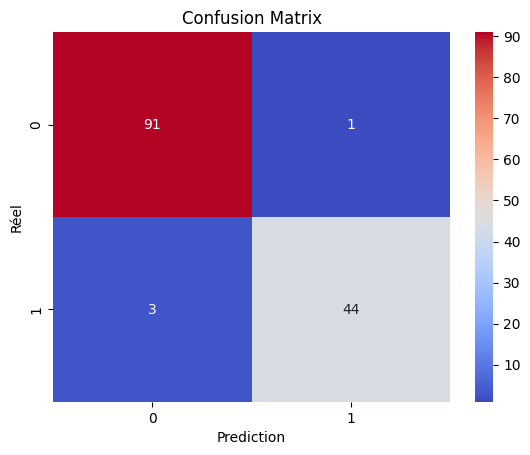

In [61]:
conf_matrix_rl = confusion_matrix(y_test, y_pred_rl)

sns.heatmap(conf_matrix_rl, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')

plt.title('Confusion Matrix')
plt.show()

### 6.2 - knn

#### 6.2.0 - Definition du modele et du pipeline

In [62]:
model_knn = KNeighborsClassifier()

In [63]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_knn', model_knn)    
])

#### 6.2.1 - Définition des hyperparametres et du randomsearchCV

In [64]:
# Définir la distribution des hyperparamètres à rechercher
param_dist_knn = {
    'model_knn__n_neighbors': randint(1, 50),              # Number of neighbors
    'model_knn__weights': ['uniform', 'distance'],         # Weight function used in prediction
    'model_knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'model_knn__leaf_size': randint(10, 50),               # Leaf size passed to BallTree or KDTree
    'model_knn__p': [1, 2]                                 # Power parameter for the Minkowski metric (1=Manhattan, 2=Euclidean)
}

In [88]:
# Configurer la recherche aléatoire
random_search_knn = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=param_dist_knn,
    n_iter=100,  
    cv=5,        # Nombre de folds pour la cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1, 
    # error_score='raise'
)

#### 6.2.2 - Entrainement et prediction du modele

In [66]:
random_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_std',
                                                                               Pipeline(steps=[('stdScaller',
                                                                                                StandardScaler())]),
                                                                               ['radius_mean',
                                                                                'texture_mean',
                                                                                'perimeter_mean',
                                                                                'area_mean',
                                                                                'smoothness_mean',
                                                                                'compactness_mean',
                                                                                'concavity_mean',
                                                                                'concave '
                                                                                'points_mean',
                                                                                'symmetry_mean',
                                                                                'radius_se',
                                                                                'perimeter_se',
                                                                                'area_se',
                                                                                'c...
                   param_distributions={'model_knn__algorithm': ['auto',
                                                                 'ball_tree',
                                                                 'kd_tree',
                                                                 'brute'],
                                        'model_knn__leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001885B98C9E0>,
                                        'model_knn__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001885B9BC320>,
                                        'model_knn__p': [1, 2],
                                        'model_knn__weights': ['uniform',
                                                               'distance']},
                   random_state=42, verbose=2)

In [67]:
# Afficher les meilleurs paramètres trouvés
print("Best parameters found: ", random_search_knn.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model_knn = random_search_knn.best_estimator_
test_score_knn = best_model_knn.score(X_test, y_test)

Best parameters found:  {'model_knn__algorithm': 'auto', 'model_knn__leaf_size': 23, 'model_knn__n_neighbors': 9, 'model_knn__p': 2, 'model_knn__weights': 'uniform'}


In [68]:
y_pred_knn = best_model_knn.predict(X_test)

#### 6.2.3 - Mesure de l'efficacité du modele

In [69]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_knn:.4f}')

Accuracy: 0.9712


In [70]:
class_report_knn = classification_report(y_test, y_pred_knn)

print(class_report_knn)

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        92
           M       1.00      0.91      0.96        47

    accuracy                           0.97       139
   macro avg       0.98      0.96      0.97       139
weighted avg       0.97      0.97      0.97       139



In [71]:
'''
Verifier la robustesse du modele
'''
# Effectuer la validation croisée
scores = cross_val_score(pipeline_knn, X, y, cv=5)


print("Scores de chaque fold : ", scores)
print("Score moyen : ", scores.mean())
print("Écart-type des scores : ", scores.std())

Scores de chaque fold :  [0.97321429 0.95495495 0.98198198 0.97297297 0.97297297]
Score moyen :  0.9712194337194336
Écart-type des scores :  0.008837363282027407


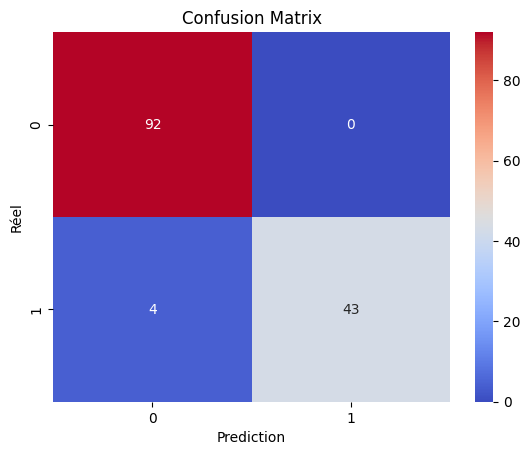

In [72]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.title('Confusion Matrix')
plt.show()

### 6.3 - Random forest classifier

#### 6.3.0 - Definition du modele et du pipeline

In [73]:
RFC = RandomForestClassifier()

In [74]:
pipeline_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RFC)
])

#### 6.3.1 - Définition des hyperparametres et du randomsearchCV

In [75]:
# Définir la distribution des hyperparamètres à rechercher
param_dist_rfc = {
    'random_forest__n_estimators': randint(10, 200),
    'random_forest__max_features': ['auto', 'sqrt', 'log2'],
    'random_forest__max_depth': randint(1, 20),
    'random_forest__min_samples_split': randint(2, 20),
    'random_forest__min_samples_leaf': randint(1, 20),
    'random_forest__bootstrap': [True, False]
}

In [76]:
# Configurer la recherche aléatoire
random_search_rfc = RandomizedSearchCV(
    estimator=pipeline_rfc,
    param_distributions=param_dist_rfc,
    n_iter=100,  
    cv=5,        # Nombre de folds pour la cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    # error_score='raise'
)

#### 6.3.2 - Entrainement et prediction du modele

In [77]:
# Exécuter la recherche aléatoire pour entrainement du modele
random_search_rfc.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dimle\D

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_std',
                                                                               Pipeline(steps=[('stdScaller',
                                                                                                StandardScaler())]),
                                                                               ['radius_mean',
                                                                                'texture_mean',
                                                                                'perimeter_mean',
                                                                                'area_mean',
                                                                                'smoothness_mean',
                                                                                'compactness_mean',
                                                                                'concavity_mean',
                                                                                'concave '
                                                                                'points_mean',
                                                                                'symmetry_mean',
                                                                                'radius_se',
                                                                                'perimeter_se',
                                                                                'area_se',
                                                                                'c...
                                        'random_forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000188648DF560>,
                                        'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000188648DF350>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018864BB5EE0>},
                   random_state=42, verbose=2)

In [78]:
# Afficher les meilleurs paramètres trouvés
print("Best parameters found: ", random_search_rfc.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model_rfc = random_search_rfc.best_estimator_
test_score_rfc = best_model_rfc.score(X_test, y_test)


''' Vérifier avec Romain car pas très clair'''
# # récupération du meilleur model pour entrainement et mesure du modele
# best_model_rf = best_model_rfc['random_forest']

Best parameters found:  {'random_forest__bootstrap': True, 'random_forest__max_depth': 8, 'random_forest__max_features': 'log2', 'random_forest__min_samples_leaf': 2, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 37}


' Vérifier avec Romain car pas très clair'

In [79]:
y_pred_rfc = best_model_rfc.predict(X_test)

#### 6.3.2 - Mesure de l'efficacité du modele

In [80]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print(f'Accuracy: {accuracy_rfc:.4f}')

Accuracy: 0.9640


In [81]:
class_report_rfc = classification_report(y_test, y_pred_rfc)

print(class_report_rfc)

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        92
           M       0.98      0.91      0.95        47

    accuracy                           0.96       139
   macro avg       0.97      0.95      0.96       139
weighted avg       0.96      0.96      0.96       139



In [82]:
'''
Verifier la robustesse du modele
'''
# Effectuer la validation croisée
scores = cross_val_score(pipeline_rfc, X, y, cv=5)


print("Scores de chaque fold : ", scores)
print("Score moyen : ", scores.mean())
print("Écart-type des scores : ", scores.std())

Scores de chaque fold :  [0.91964286 0.95495495 0.98198198 0.99099099 0.96396396]
Score moyen :  0.9623069498069498
Écart-type des scores :  0.024847146463153117


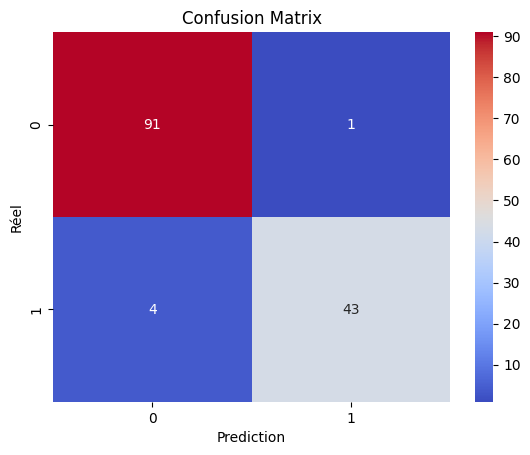

In [83]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.title('Confusion Matrix')
plt.show()

### 6.4 - MLPClassifier de sk-learn

#### 6.4.0 - Definition du modele et du pipeline

In [116]:
model_MLPC = MLPClassifier(
    )


In [117]:
pipeline_MLPC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Multi_Layer_Perceptron_Classifier', model_MLPC)
])

#### 6.4.1 - Définition des hyperparametres et du randomsearchCV

In [118]:
param_dist_mlpc = {
    'Multi_Layer_Perceptron_Classifier__hidden_layer_sizes': [(50,), (100,), (100, 100)],
    'Multi_Layer_Perceptron_Classifier__activation': ['tanh', 'relu'],
    'Multi_Layer_Perceptron_Classifier__solver': ['sgd', 'adam'],
    'Multi_Layer_Perceptron_Classifier__alpha': uniform(0.0001, 0.1),
    'Multi_Layer_Perceptron_Classifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'Multi_Layer_Perceptron_Classifier__max_iter': randint(200, 500)
}

In [119]:
random_search_mlpc = RandomizedSearchCV(
    estimator=pipeline_MLPC,
    param_distributions=param_dist_mlpc,
    n_iter=100,  # Nombre de configurations d'hyperparamètres à essayer
    cv=5,        # Nombre de folds pour la cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    # error_score='raise'
)

#### 6.4.2 - Entrainement et prediction du modele

In [126]:
random_search_mlpc.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_std',
                                                                               Pipeline(steps=[('stdScaller',
                                                                                                StandardScaler())]),
                                                                               ['radius_mean',
                                                                                'texture_mean',
                                                                                'perimeter_mean',
                                                                                'area_mean',
                                                                                'smoothness_mean',
                                                                                'compactness_mean',
                                                                                'concavity_mean',
                                                                                'concave '
                                                                                'points_mean',
                                                                                'symmetry_mean',
                                                                                'radius_se',
                                                                                'perimeter_se',
                                                                                'area_se',
                                                                                'c...
                                        'Multi_Layer_Perceptron_Classifier__hidden_layer_sizes': [(50,),
                                                                                                  (100,),
                                                                                                  (100,
                                                                                                   100)],
                                        'Multi_Layer_Perceptron_Classifier__learning_rate': ['constant',
                                                                                             'invscaling',
                                                                                             'adaptive'],
                                        'Multi_Layer_Perceptron_Classifier__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001886342D7F0>,
                                        'Multi_Layer_Perceptron_Classifier__solver': ['sgd',
                                                                                      'adam']},
                   random_state=42, verbose=2)

In [129]:
# Afficher les meilleurs paramètres trouvés
print("Best parameters found: ", random_search_mlpc.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model_MLPC = random_search_mlpc.best_estimator_
test_score_MLPC = best_model_MLPC.score(X_test, y_test)


''' Vérifier avec Romain car pas très clair'''
# # récupération du meilleur model pour entrainement et mesure du modele
# best_model_rf = best_model_rfc['random_forest']

Best parameters found:  {'Multi_Layer_Perceptron_Classifier__activation': 'relu', 'Multi_Layer_Perceptron_Classifier__alpha': 0.0094981939840869, 'Multi_Layer_Perceptron_Classifier__hidden_layer_sizes': (100, 100), 'Multi_Layer_Perceptron_Classifier__learning_rate': 'adaptive', 'Multi_Layer_Perceptron_Classifier__max_iter': 250, 'Multi_Layer_Perceptron_Classifier__solver': 'sgd'}


' Vérifier avec Romain car pas très clair'

In [130]:
y_pred_MLPC = best_model_MLPC.predict(X_test)

#### 6.4.2 - Mesure de l'efficacité du modele

In [131]:
accuracy_MLPC = accuracy_score(y_test, y_pred_MLPC)

print(f'Accuracy: {accuracy_MLPC:.4f}')

Accuracy: 0.9640


In [132]:
class_report_MLPC = classification_report(y_test, y_pred_MLPC)

print(class_report_MLPC)

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        92
           M       1.00      0.89      0.94        47

    accuracy                           0.96       139
   macro avg       0.97      0.95      0.96       139
weighted avg       0.97      0.96      0.96       139



In [133]:
'''
Verifier la robustesse du modele
'''
# Effectuer la validation croisée
scores = cross_val_score(pipeline_MLPC, X, y, cv=5)


print("Scores de chaque fold : ", scores)
print("Score moyen : ", scores.mean())
print("Écart-type des scores : ", scores.std())

c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

Scores de chaque fold :  [0.97321429 0.97297297 0.96396396 0.97297297 0.99099099]
Score moyen :  0.9748230373230372
Écart-type des scores :  0.008817661344872012


c:\Users\dimle\Documents\clone_repo\semiology_AI\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


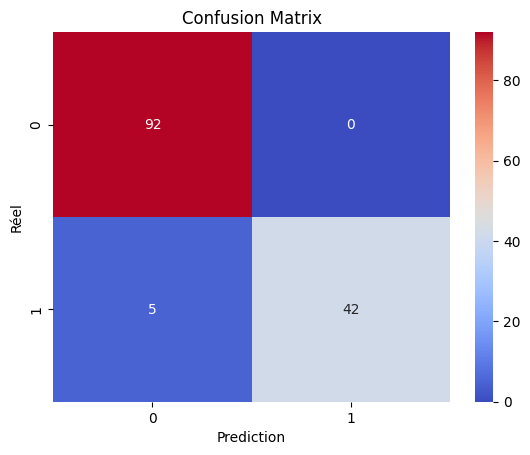

In [134]:
conf_matrix_MLPC = confusion_matrix(y_test, y_pred_MLPC)

sns.heatmap(conf_matrix_MLPC, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.title('Confusion Matrix')
plt.show()